# Simple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Machine+Learning+A-Z+(Codes+and+Datasets).zip (Unzipped Files)/Machine+Learning+A-Z+(Codes+and+Datasets)/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [ ]:
class LinearRegression:
    def __init__(self, lr=0.001, iters = 1000): #lr is learning rate or alpha, iters is the number of iterations in the grad descent
        self.lr =lr
        self.iters = iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        #initialize the w and b values with zero
        n_samp, feat = X.shape
        self.w = np.zeros(feat)
        self.b = 0 
        
        #initialize with random values
        #self.w = np.random.rand(feat)
        #self.b = np.random.rand(feat)
        
        for _ in range(self.iters): 
            #find the approximation
            y_hat = np.dot(X, self.w) + self.b    #dot product of weights and input + bias
            #calculate the derivative
            dw = (1/n_samp)*2 * np.sum(np.dot(X.T, (y_hat - y)))
            db = (1/n_samp) * np.sum((y_hat - y))
            #update the weights
            self.w -= self.lr*dw
            self.b -= self.lr*db
            
    def predict(self, X):
        #calculate the predicted y given X
        #use the approximation
        y_hat = np.dot(X, self.w) + self.b
        return y_hat
        
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

regressor = LinearRegression()
regressor.fit(np.array(X_train), np.array(y_train))

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 25311.29577453 137509.07333138  58460.6391436   55910.68965367
 127309.27537166 117109.47741195 128584.25011663  57185.66439864
  73760.33608317 106909.67945224]


## Visualising the Training set results

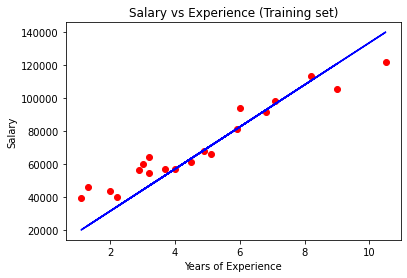

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

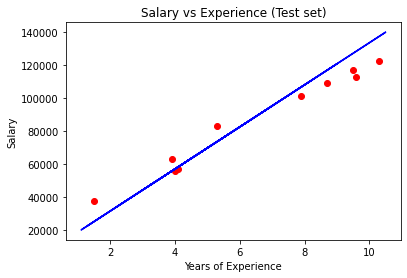

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Error

In [ ]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_pred , y_test) )

Mean absolute error: 8443.74
Residual sum of squares (MSE): 91955236.09
R2-score: 0.93
